In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
from collections import deque
import random
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="../Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


Episode 100	Average Score: 1.29
Episode 200	Average Score: 4.66
Episode 300	Average Score: 8.46
Episode 400	Average Score: 10.96
Episode 500	Average Score: 12.93
Episode 504	Average Score: 13.08
Environment solved in 404 episodes!	Average Score: 13.08


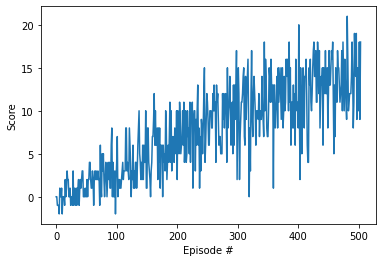

In [5]:
agent = Agent(state_size = state_size, action_size = action_size, seed = 0)

n_episodes = 2000
max_steps_per_ep = 1000
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.995

scores = []
scores_window = deque(maxlen=100)
eps = eps_start

for ep in range(1,1+n_episodes):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0] 
    score = 0
    for step in range(max_steps_per_ep):
        action = agent.act(state, eps)
        env_info = env.step(action.astype(int))[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state,action,reward,next_state,done)
        state = next_state
        score += reward
        if done:
            break
    eps = max(eps_end, eps_decay*eps)
    scores_window.append(score)
    scores.append(score)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)), end="")
    if ep % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))
    if np.mean(scores_window)>=13.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ep-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
env.close()

In [6]:

# Print details of qnetwork model
from torchsummary import summary

agent = Agent(state_size = state_size, action_size = action_size, seed = 0)

summary(agent.qnetwork_local,(state_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           2,432
            Linear-2                   [-1, 64]           4,160
            Linear-3                    [-1, 4]             260
Total params: 6,852
Trainable params: 6,852
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


To view the agent use the cell below

In [1]:
from agent import Agent
from unityagents import UnityEnvironment
import torch
import numpy as np

env = UnityEnvironment(file_name="../Banana_Windows_x86_64/Banana.exe")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

agent =  Agent(state_size = state_size, action_size = action_size, seed = 0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0] 
    for j in range(200):
        action = agent.act(state)
        env_info = env.step(action.astype(int))[brain_name]
        state = env_info.vector_observations[0]
        done = env_info.local_done[0]
        if done:
            break

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
